In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
excel_content = pd.read_excel('CC-3Y-Transactions.xlsx', sheet_name='Credit-Card-Transactions')

In [3]:
excel_content['Year'] = pd.DatetimeIndex(excel_content['Date']).year

In [4]:
excel_2013 = excel_content[(excel_content['Year'] == 2013)]

In [5]:
grp2013 = excel_2013.groupby(['Year','City'],as_index=False)['Amount'].sum()

In [6]:
grp2013sorted = grp2013.sort_values(by='Amount',ascending=False).head(5)

In [7]:
grp2013sorted.set_index('Year', inplace=True)

In [8]:
excel_2014 = excel_content[(excel_content['Year'] == 2014)]

In [9]:
grp2014 = excel_2014.groupby(['Year','City'],as_index=False)['Amount'].sum()

In [10]:
grp2014sorted = grp2014.sort_values(by='Amount',ascending=False).head(5)

In [11]:
grp2014sorted.set_index('Year', inplace=True)

In [12]:
excel_2015 = excel_content[(excel_content['Year'] == 2015)]

In [13]:
grp2015 = excel_2015.groupby(['Year','City'],as_index=False)['Amount'].sum()

In [14]:
grp2015sorted = grp2015.sort_values(by='Amount',ascending=False).head(5)

In [15]:
grp2015sorted.set_index('Year', inplace=True)

In [16]:
grp2013sorted.T

Year,2013,2013,2013,2013,2013
City,"Bengaluru, India","Greater Mumbai, India","Ahmedabad, India","Delhi, India","Kanpur, India"
Amount,84999287,84735652,83291837,82126961,19640338


In [17]:
grp2014sorted.T

Year,2014,2014,2014,2014,2014
City,"Bengaluru, India","Greater Mumbai, India","Ahmedabad, India","Delhi, India","Hyderabad, India"
Amount,351482095,349709415,348289187,329591186,71066005


In [18]:
grp2015sorted.T

Year,2015,2015,2015,2015,2015
City,"Delhi, India","Greater Mumbai, India","Ahmedabad, India","Bengaluru, India","Kolkata, India"
Amount,145211065,142306409,136213286,135845357,30918731


[Text(0, 0, 'Delhi, India'),
 Text(1, 0, 'Greater Mumbai, India'),
 Text(2, 0, 'Ahmedabad, India'),
 Text(3, 0, 'Bengaluru, India'),
 Text(4, 0, 'Kolkata, India')]

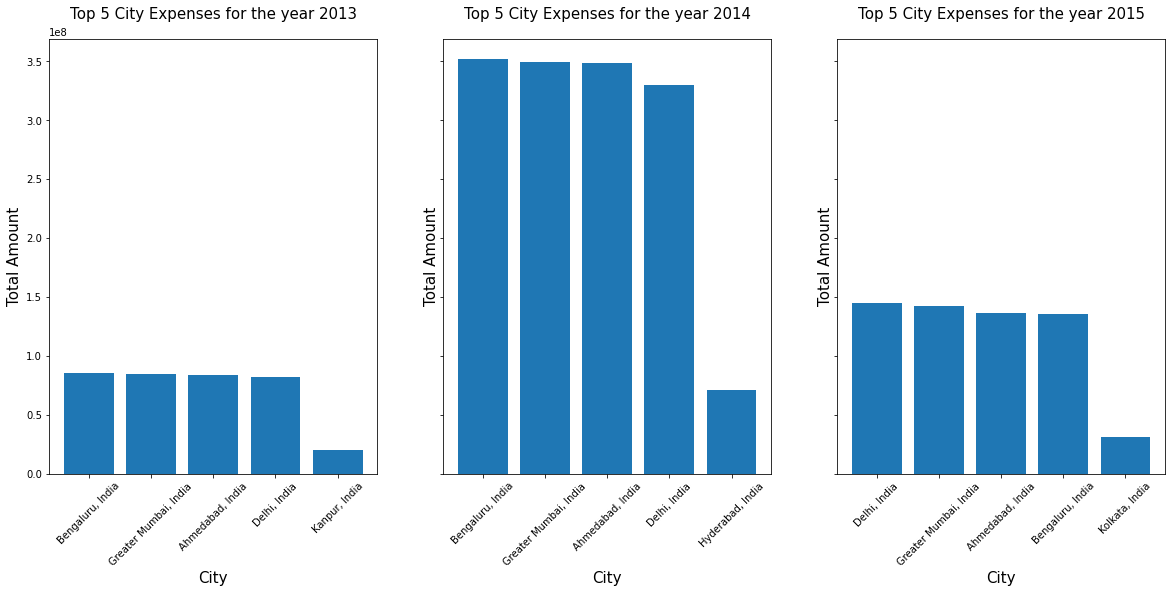

In [19]:
City_name2013=list(grp2013sorted['City'].unique())
index2013 = range(len(City_name2013))
Amount_per_city2013 = grp2013sorted.groupby('City')['Amount'].mean()
Amount_per_city2013 = Amount_per_city2013[City_name2013]

City_name2014=list(grp2014sorted['City'].unique())
index2014 = range(len(City_name2014))
Amount_per_city2014 = grp2014sorted.groupby('City')['Amount'].mean()
Amount_per_city2014 = Amount_per_city2014[City_name2014]

City_name2015=list(grp2015sorted['City'].unique())
index2015 = range(len(City_name2015))
Amount_per_city2015 = grp2015sorted.groupby('City')['Amount'].mean()
Amount_per_city2015 = Amount_per_city2015[City_name2015]

fig, axs = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

axs[0].bar(index2013, Amount_per_city2013)
axs[0].set_title('Top 5 City Expenses for the year 2013', fontsize=15, pad=20)
axs[0].set_xlabel('City', fontsize=15)
axs[0].set_ylabel('Total Amount', fontsize=15)
axs[0].set_xticks(index2013)
axs[0].set_xticklabels(City_name2013,rotation = 45)

axs[1].bar(index2014, Amount_per_city2014)
axs[1].set_title('Top 5 City Expenses for the year 2014', fontsize=15, pad=20)
axs[1].set_xlabel('City', fontsize=15)
axs[1].set_ylabel('Total Amount', fontsize=15)
axs[1].set_xticks(index2014)
axs[1].set_xticklabels(City_name2014,rotation = 45)

axs[2].bar(index2015, Amount_per_city2015)
axs[2].set_title('Top 5 City Expenses for the year 2015', fontsize=15, pad=20)
axs[2].set_xlabel('City', fontsize=15)
axs[2].set_ylabel('Total Amount', fontsize=15)
axs[2].set_xticks(index2015)
axs[2].set_xticklabels(City_name2015,rotation = 45)

In [20]:
excel_content['quarters'] = excel_content.Date.dt.quarter

In [21]:
group = excel_content.groupby(['Year','Gender','quarters'],as_index=False)['Amount'].sum()

In [22]:
pivotgroup = group.pivot(index=['Year','Gender'], columns='quarters', values='Amount')

In [23]:
excel_2015 = excel_content[(excel_content['Year'] == 2015)]

In [24]:
pivotgroup

quarters               1            2            3            4
Year Gender                                                    
2013 F               NaN          NaN          NaN  333421908.0
     M               NaN          NaN          NaN  280221976.0
2014 F       318768288.0  331421060.0  335382914.0  334689993.0
     M       281336181.0  269947023.0  290613061.0  292555513.0
2015 F       344993188.0  206633679.0          NaN          NaN
     M       279678969.0  175169620.0          NaN          NaN

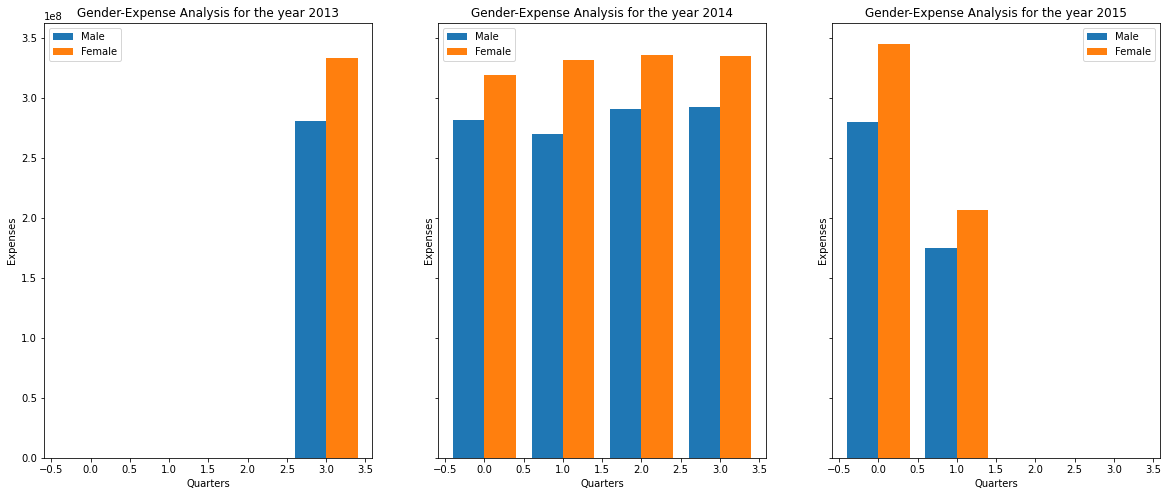

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

quarters = [1,2,3,4]
group2013FQ4 = group[(group['Year'] == 2013) & (group['Gender'] == 'F') & (group['quarters'] == 4)]; 
group2013MQ4 = group[(group['Year'] == 2013) & (group['Gender'] == 'M') & (group['quarters'] == 4)]; 
male2013 = [0,0,0,group2013MQ4['Amount'].values[0]]
female2013 = [0,0,0,group2013FQ4['Amount'].values[0]]
  
X_axis = np.arange(len(quarters))
  
axs[0].bar(X_axis - 0.2, male2013, 0.4, label = 'Male')
axs[0].bar(X_axis + 0.2, female2013, 0.4, label = 'Female')  
axs[0].set_xlabel("Quarters")
axs[0].set_ylabel("Expenses")
axs[0].set_title("Gender-Expense Analysis for the year 2013")
axs[0].legend()

group2014FQ1 = group[(group['Year'] == 2014) & (group['Gender'] == 'F') & (group['quarters'] == 1)];
group2014FQ2 = group[(group['Year'] == 2014) & (group['Gender'] == 'F') & (group['quarters'] == 2)]; 
group2014FQ3 = group[(group['Year'] == 2014) & (group['Gender'] == 'F') & (group['quarters'] == 3)];
group2014FQ4 = group[(group['Year'] == 2014) & (group['Gender'] == 'F') & (group['quarters'] == 4)]; 

group2014MQ1 = group[(group['Year'] == 2014) & (group['Gender'] == 'M') & (group['quarters'] == 1)];
group2014MQ2 = group[(group['Year'] == 2014) & (group['Gender'] == 'M') & (group['quarters'] == 2)]; 
group2014MQ3 = group[(group['Year'] == 2014) & (group['Gender'] == 'M') & (group['quarters'] == 3)];
group2014MQ4 = group[(group['Year'] == 2014) & (group['Gender'] == 'M') & (group['quarters'] == 4)]; 


male2014 = [group2014MQ1['Amount'].values[0],group2014MQ2['Amount'].values[0],group2014MQ3['Amount'].values[0],group2014MQ4['Amount'].values[0]]
female2014 = [group2014FQ1['Amount'].values[0],group2014FQ2['Amount'].values[0],group2014FQ3['Amount'].values[0],group2014FQ4['Amount'].values[0]]

axs[1].bar(X_axis - 0.2, male2014, 0.4, label = 'Male')
axs[1].bar(X_axis + 0.2, female2014, 0.4, label = 'Female')
axs[1].set_xlabel("Quarters")
axs[1].set_ylabel("Expenses")
axs[1].set_title("Gender-Expense Analysis for the year 2014")
axs[1].legend()


group2015FQ1 = group[(group['Year'] == 2015) & (group['Gender'] == 'F') & (group['quarters'] == 1)];
group2015FQ2 = group[(group['Year'] == 2015) & (group['Gender'] == 'F') & (group['quarters'] == 2)];

group2015MQ1 = group[(group['Year'] == 2015) & (group['Gender'] == 'M') & (group['quarters'] == 1)];
group2015MQ2 = group[(group['Year'] == 2015) & (group['Gender'] == 'M') & (group['quarters'] == 2)];


male2015 = [group2015MQ1['Amount'].values[0],group2015MQ2['Amount'].values[0],0,0]
female2015 = [group2015FQ1['Amount'].values[0],group2015FQ2['Amount'].values[0],0,0]

axs[2].bar(X_axis - 0.2, male2015, 0.4, label = 'Male')
axs[2].bar(X_axis + 0.2, female2015, 0.4, label = 'Female')
axs[2].set_xlabel("Quarters")
axs[2].set_ylabel("Expenses")
axs[2].set_title("Gender-Expense Analysis for the year 2015")
axs[2].legend()


In [26]:
excel_2013smallest = excel_2013.groupby(['Year','Exp Type'],sort = True,as_index=False).sum().nsmallest(3,'Amount')

In [27]:
excel_2013smallest.set_index('Year', inplace=True)

In [28]:
excel_2014smallest = excel_2014.groupby(['Year','Exp Type'],sort = True,as_index=False).sum().nsmallest(3,'Amount')

In [29]:
excel_2014smallest.set_index('Year', inplace=True)

In [30]:
excel_2015smallest = excel_2015.groupby(['Year','Exp Type'],sort = True,as_index=False).sum().nsmallest(3,'Amount')

In [31]:
excel_2015smallest.set_index('Year', inplace=True)

In [32]:
excel_2013smallest.T

Year,2013,2013,2013
Exp Type,Travel,Grocery,Entertainment
Amount,15353606,111806890,113094669


In [33]:
excel_2014smallest.T

Year,2014,2014,2014
Exp Type,Travel,Grocery,Entertainment
Amount,65532848,428628961,443730570


In [34]:
excel_2015smallest.T

Year,2015,2015,2015
Exp Type,Travel,Entertainment,Grocery
Amount,28369157,169612297,177772072
quarters,252,1516,1618


[Text(0, 0, 'Travel'), Text(1, 0, 'Entertainment'), Text(2, 0, 'Grocery')]

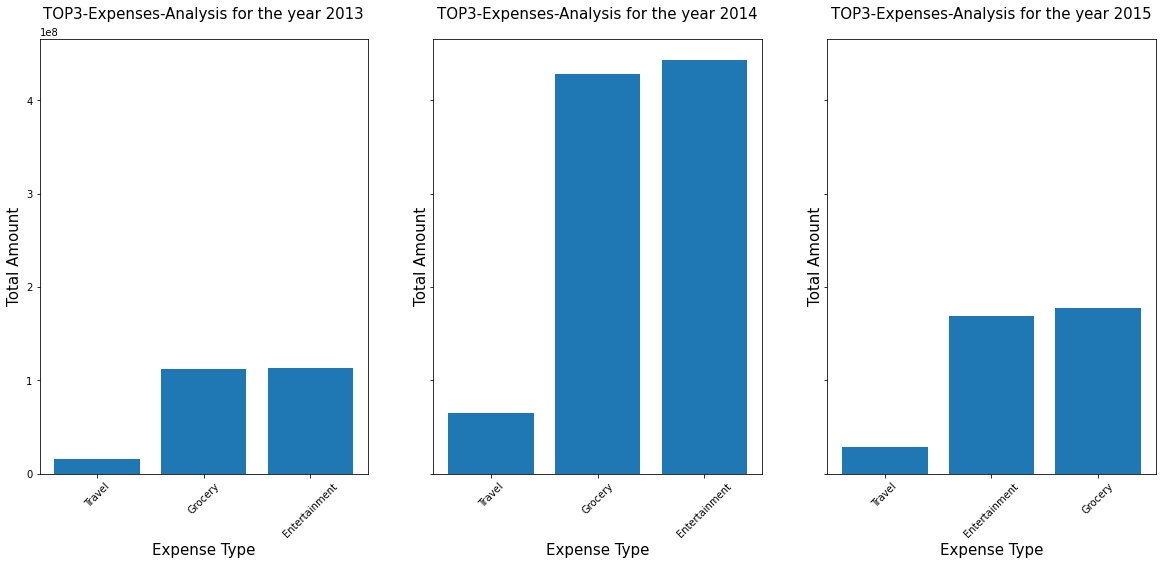

In [35]:
Exp_type2013=list(excel_2013smallest['Exp Type'].unique())
expindex2013 = range(len(Exp_type2013))
Amount_per_exptype2013 = excel_2013smallest.groupby('Exp Type')['Amount'].mean()
Amount_per_exptype2013 = Amount_per_exptype2013[Exp_type2013]

Exp_type2014=list(excel_2014smallest['Exp Type'].unique())
expindex2014 = range(len(Exp_type2014))
Amount_per_exptype2014 = excel_2014smallest.groupby('Exp Type')['Amount'].mean()
Amount_per_exptype2014 = Amount_per_exptype2014[Exp_type2014]

Exp_type2015=list(excel_2015smallest['Exp Type'].unique())
expindex2015 = range(len(Exp_type2015))
Amount_per_exptype2015 = excel_2015smallest.groupby('Exp Type')['Amount'].mean()
Amount_per_exptype2015 = Amount_per_exptype2015[Exp_type2015]

fig, axs = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

axs[0].bar(expindex2013, Amount_per_exptype2013)
axs[0].set_title('TOP3-Expenses-Analysis for the year 2013', fontsize=15, pad=20)
axs[0].set_xlabel('Expense Type', fontsize=15)
axs[0].set_ylabel('Total Amount', fontsize=15)
axs[0].set_xticks(expindex2013)
axs[0].set_xticklabels(Exp_type2013,rotation = 45)

axs[1].bar(expindex2014, Amount_per_exptype2014)
axs[1].set_title('TOP3-Expenses-Analysis for the year 2014', fontsize=15, pad=20)
axs[1].set_xlabel('Expense Type', fontsize=15)
axs[1].set_ylabel('Total Amount', fontsize=15)
axs[1].set_xticks(expindex2013)
axs[1].set_xticklabels(Exp_type2014,rotation = 45)

axs[2].bar(expindex2015, Amount_per_exptype2015)
axs[2].set_title('TOP3-Expenses-Analysis for the year 2015', fontsize=15, pad=20)
axs[2].set_xlabel('Expense Type', fontsize=15)
axs[2].set_ylabel('Total Amount', fontsize=15)
axs[2].set_xticks(expindex2013)
axs[2].set_xticklabels(Exp_type2015,rotation = 45)

In [36]:
excel_content

,City,Date,Card Type,Exp Type,Gender,Amount,Year,quarters
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014,4
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014,3
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014,3
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014,2
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015,2
...,...,...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191,2014,2
26048,"Pune, India",2014-08-03,Signature,Travel,M,246316,2014,3
26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019,2015,1
26050,"Kanpur, India",2014-09-14,Silver,Travel,M,88174,2014,3


In [37]:
excel_content['Day'] = pd.DatetimeIndex(excel_content['Date']).day_name()

In [38]:
## FRAUD DETECTION
print('FRAUD DETECTION\n')
print('BUSINESS RULE: Any bill payment done on a weekend will be a potential fraud since in India, people can only pay their bills during weekdays. All the billing offices are closed in India during the weekend')
# BUSINESS RULE: Any bill payment done on a weekend will be a potential fraud since in India, people can only pay their bills during weekdays. All the billing offices are closed in India during the weekend.
frauddata = excel_content[((excel_content['Day'] == 'Saturday' ) | (excel_content['Day'] == 'Sunday' )) & (excel_content['Exp Type'] == 'Bills')]; frauddata

FRAUD DETECTION

BUSINESS RULE: Any bill payment done on a weekend will be a potential fraud since in India, people can only pay their bills during weekdays. All the billing offices are closed in India during the weekend


,City,Date,Card Type,Exp Type,Gender,Amount,Year,quarters,Day
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014,2,Saturday
10,"Delhi, India",2014-06-22,Platinum,Bills,F,280061,2014,2,Sunday
11,"Greater Mumbai, India",2013-12-07,Signature,Bills,F,278036,2013,4,Saturday
13,"Delhi, India",2014-04-27,Signature,Bills,F,254359,2014,2,Sunday
16,"Greater Mumbai, India",2014-06-14,Signature,Bills,F,421878,2014,2,Saturday
...,...,...,...,...,...,...,...,...,...
25185,"Hyderabad, India",2013-12-14,Gold,Bills,F,86139,2013,4,Saturday
25198,"Chennai, India",2014-08-30,Platinum,Bills,F,115739,2014,3,Saturday
25232,"Hyderabad, India",2013-10-12,Platinum,Bills,M,126949,2013,4,Saturday
25309,"Jaipur, India",2013-12-01,Silver,Bills,M,157997,2013,4,Sunday
